# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file   = "data/train.p"
validation_file = "data/valid.p"
testing_file    = "data/test.p"

with open(training_file,   mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file,    mode='rb') as f:
    test  = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test,  y_test  =  test['features'],  test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = np.shape(X_train)

# TODO: Number of validation examples
n_validation = np.shape(X_valid)

# TODO: Number of testing examples.
n_test = np.shape(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples   =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples    =", n_test)
print("Image data shape              =", image_shape)
print("Number of classes             =", n_classes)

Number of training examples   = (34799, 32, 32, 3)
Number of validation examples = (4410, 32, 32, 3)
Number of testing examples    = (12630, 32, 32, 3)
Image data shape              = (32, 32, 3)
Number of classes             = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Let's begin with some examples of images contained in the data set:

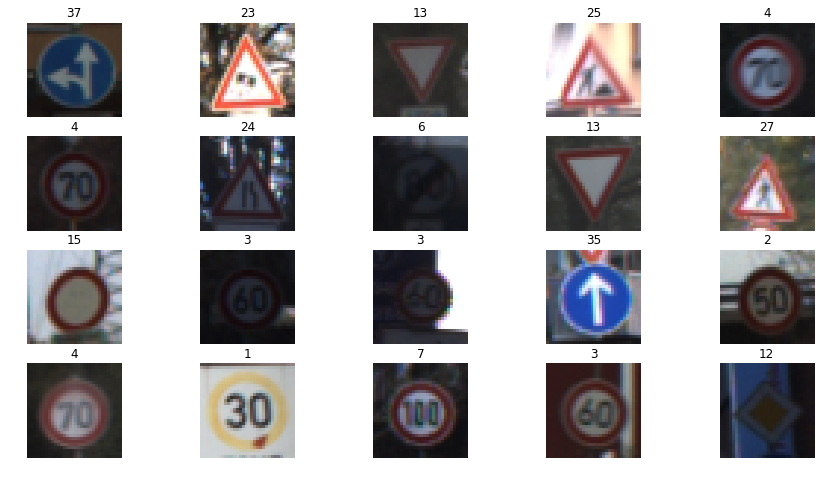

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# Let's show 20 random examples in the Training data
fig, axs = plt.subplots(4,5, figsize=(15, 8))
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

Now time to see how each class is represented. A distribution of samples for each class:

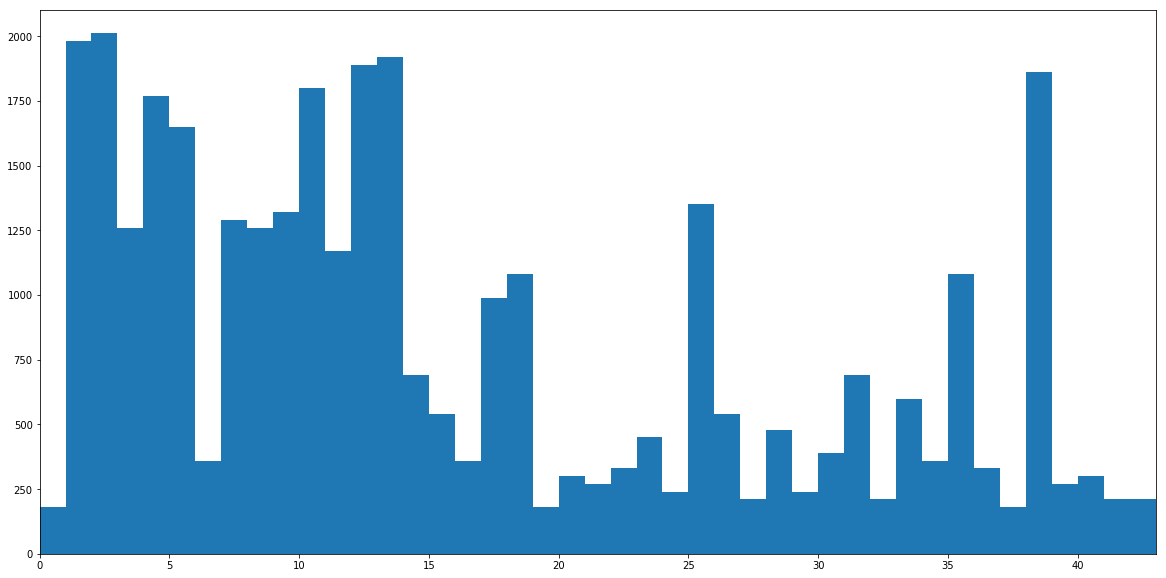

In [4]:
### Let's see the training class distribution.
plt.figure(figsize = (20, 10))
plt.hist(y_train, bins = range(44))
plt.axis([0, n_classes, 0, 2100])
plt.show()

Some examples of the Validation data set:

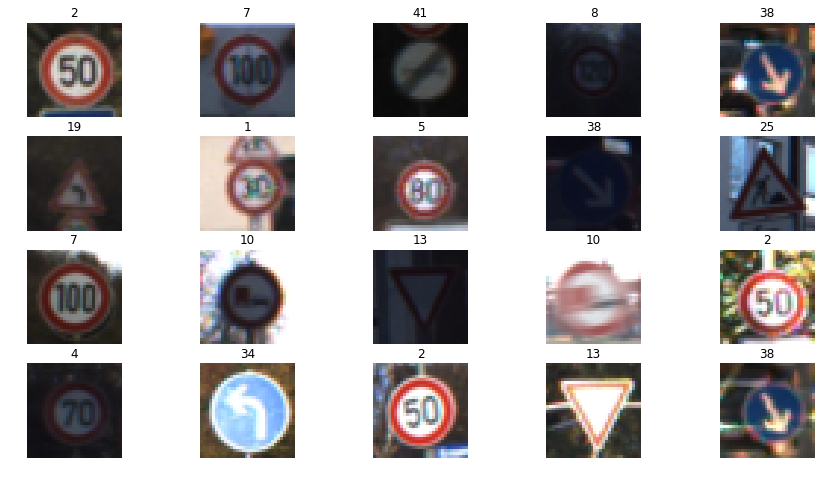

In [5]:
# Let's show 20 random examples in the Validation data
fig, axs = plt.subplots(4,5, figsize=(15, 8))
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X_valid))
    image = X_valid[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_valid[index])

The distribution of classes in Validation data set:

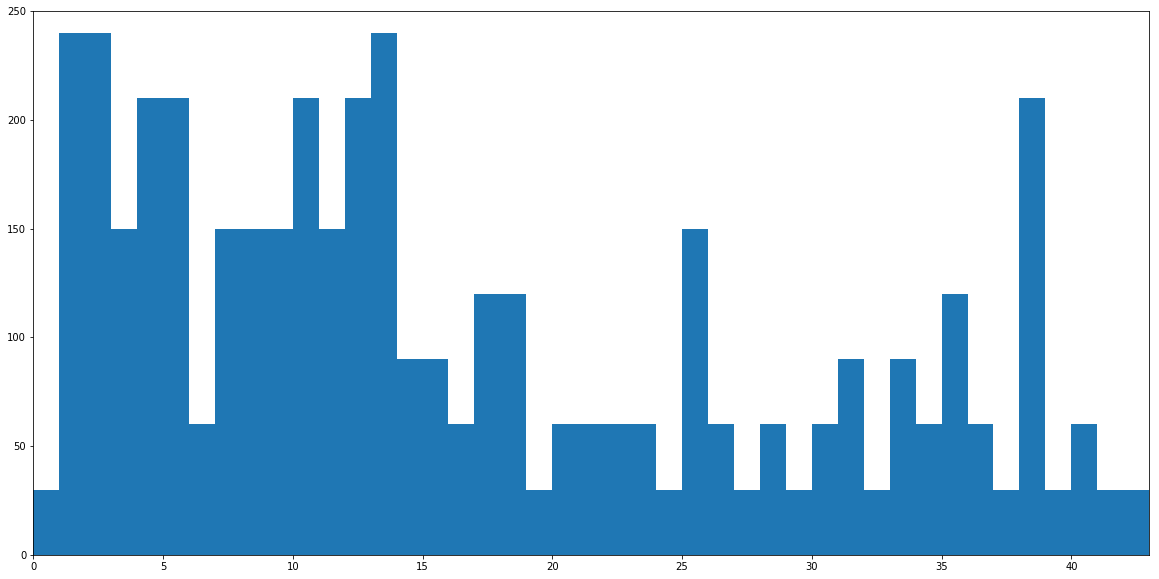

In [6]:
### Let's see the validation class distribution.
plt.figure(figsize = (20, 10))
plt.hist(y_valid, bins = range(44))
plt.axis([0, n_classes, 0, 250])
plt.show()

Some examples of Test data set:

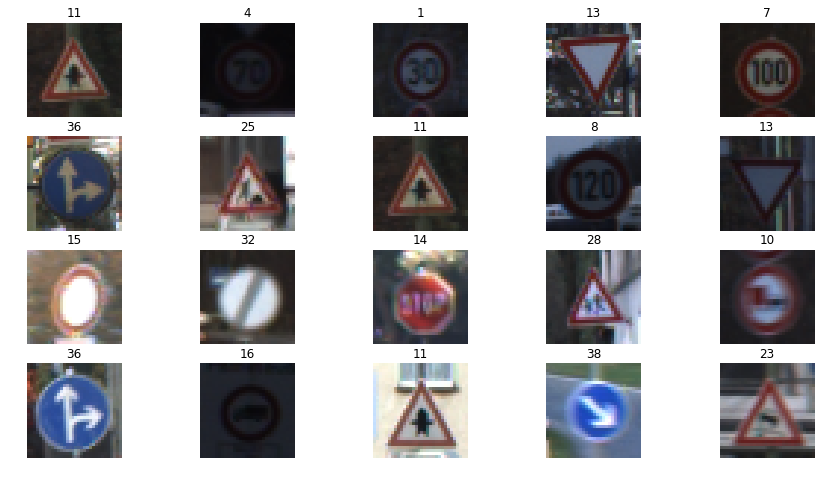

In [7]:
# Let's show 20 random examples in the Test data
fig, axs = plt.subplots(4,5, figsize=(15, 8))
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X_test))
    image = X_test[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_test[index])

The distribution of classes in Validation data set:

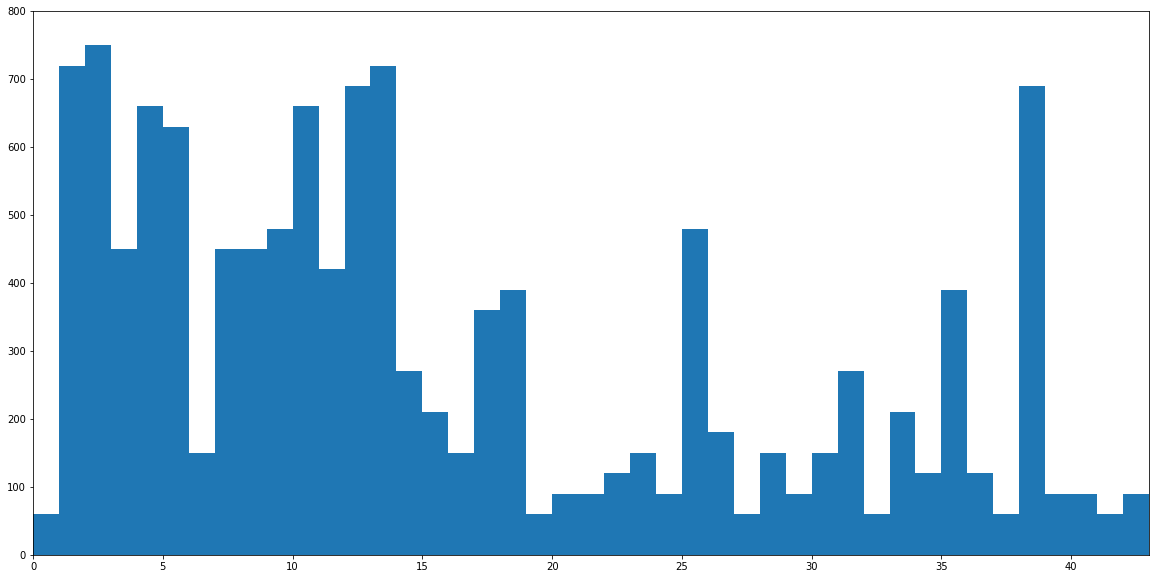

In [8]:
### Let's see the test class distribution.
plt.figure(figsize = (20, 10))
plt.hist(y_test, bins = range(44))
plt.axis([0, n_classes, 0, 800])
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

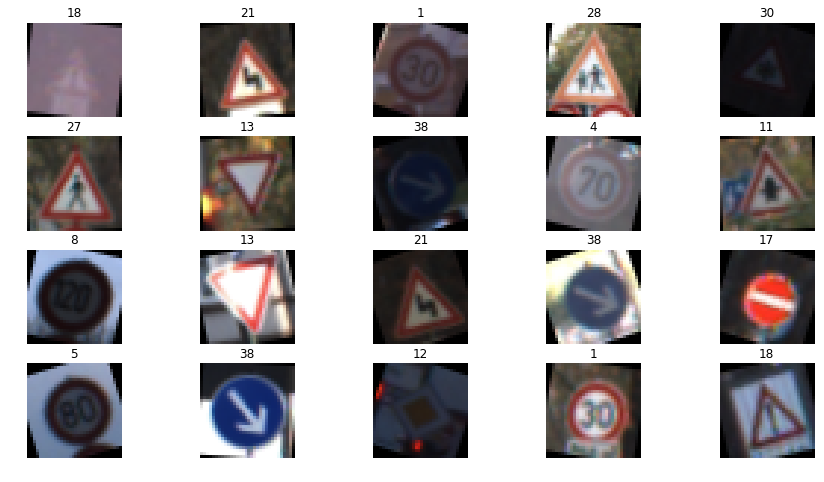

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2

### First some helper functions for creating augmented data.
### This function takes an image and performs a random rotation in the range of [-angle, angle].
def random_rotation(image, angle = 20):
    theta   = np.random.uniform(-angle, angle)
    center  = tuple(np.array(image.shape)[:2] / 2.0)
    shape   = tuple(np.array(image.shape)[:2])
    M       = cv2.getRotationMatrix2D(center, theta, 1.0)
    rot_img = cv2.warpAffine(image, M, shape)
    return rot_img

### Let's test this function.
fig, axs = plt.subplots(4,5, figsize=(15, 8))
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X_train))
    image = random_rotation(X_train[index])
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

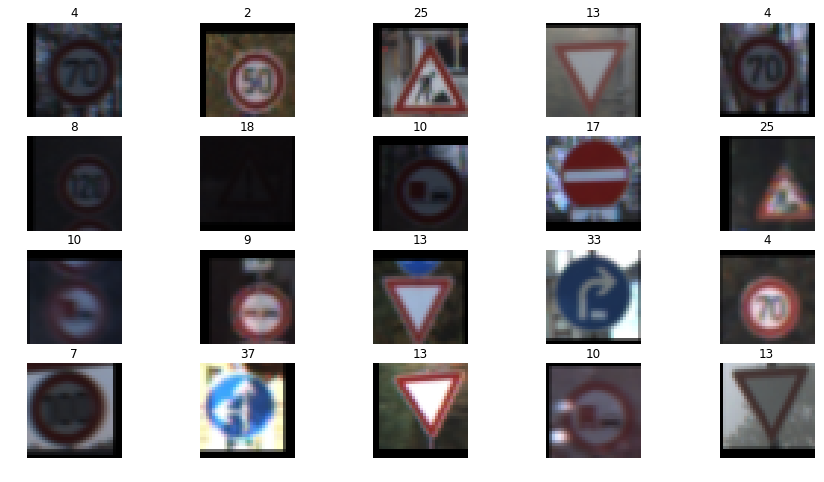

In [10]:
### The next helper function is a random translation.
def random_translation(image, translation = (4, 4)):
    cx      = np.random.uniform(-translation[0], translation[0])
    cy      = np.random.uniform(-translation[1], translation[1])
    shape   = tuple(np.array(image.shape)[:2])
    M       = np.float32([[1, 0, cx],[0, 1, cy]])
    tra_img = cv2.warpAffine(image, M, shape)
    return tra_img

### Let's test this function.
fig, axs = plt.subplots(4,5, figsize=(15, 8))
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X_train))
    image = random_translation(X_train[index])
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

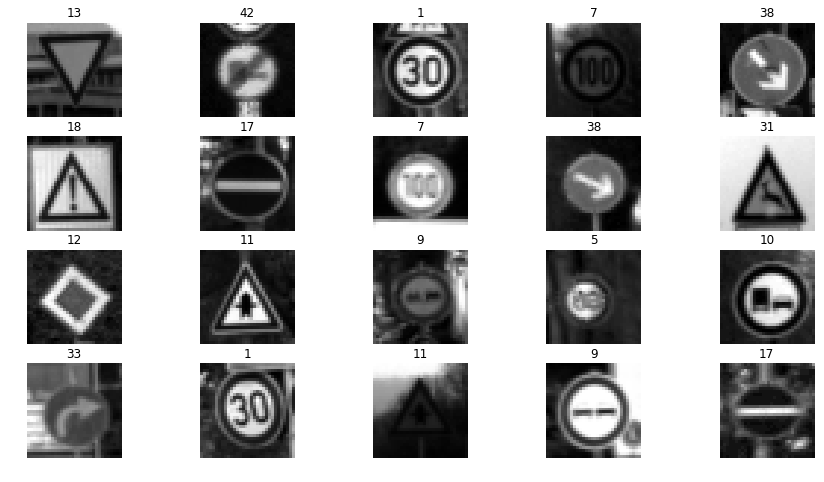

In [11]:
### The architecture that I'm going to use takes gray images as inputs.
### So a helper function for this task is created.
def gray_scale(image):
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_img = gray_img.reshape(gray_img.shape[0], gray_img.shape[1], 1)
    return gray_img

### Let's test this function.
fig, axs = plt.subplots(4,5, figsize=(15, 8))
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X_train))
    image = gray_scale(X_train[index])
    axs[i].axis('off')
    axs[i].imshow(image.squeeze(), cmap = 'gray')
    axs[i].set_title(y_train[index])

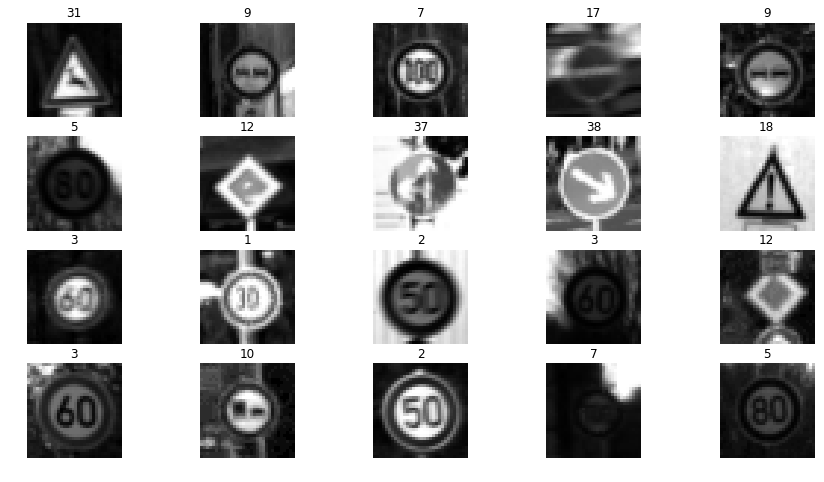

In [12]:
### Last but not least a normalization through mean and stdv.
### This function takes as input a gray sclae image.
def norm(image):
    image    = image.astype(np.float32)
    norm_img = np.zeros(shape = np.shape(image), dtype = np.float32)
    norm_img = cv2.normalize(image, 
                             norm_img,
                             alpha = -1.0, 
                             beta  = 1.0, 
                             norm_type = cv2.NORM_MINMAX, 
                             dtype = cv2.CV_32F)
    norm_img = norm_img.reshape(gray_img.shape[0], gray_img.shape[1], 1)
    return norm_img

### Let's test this function.
fig, axs = plt.subplots(4,5, figsize=(15, 8))
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X_train))
    gray_img = gray_scale(X_train[index])
    norm_img = norm(gray_img)
    axs[i].axis('off')
    axs[i].imshow(norm_img.squeeze(), cmap = 'gray')
    axs[i].set_title(y_train[index])

The order for data pre-processing and augmentation is as follows:

- Gray Scale Transform
- Random Rotation
- Random Translation
- Image Normalization

In [13]:
### Next step is to perform a Data Augmentation Pipeline.
### I'm going to be a little bit agressive with the augmentation.

### Let's get the maximum number of items in a class
nsample_classes = np.bincount(y_train)
nmax_sample = max(nsample_classes)

print("Number of samples in each class: ", nsample_classes)
print("Max number of samples in a class: ", nmax_sample)

Number of samples in each class:  [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
Max number of samples in a class:  2010


In [14]:
### let's begin with the data augmentation.
### First identify how many extra samples are needed to generate.
nextra_samples = (nmax_sample - nsample_classes)
print("Number of extra sample needed to have the same volume in each class: ", nextra_samples)

Number of extra sample needed to have the same volume in each class:  [1830   30    0  750  240  360 1650  720  750  690  210  840  120   90 1320
 1470 1650 1020  930 1830 1710 1740 1680 1560 1770  660 1470 1800 1530 1770
 1620 1320 1800 1411 1650  930 1680 1830  150 1740 1710 1800 1800]


In [15]:
### Defining new containers for the pre-process and augmented data.
ppa_X_train = []
ppa_y_train = []

### Rotation and Translation are applied to augment data and at 
### the end.
for index, image in enumerate(X_train):
    gray_img = gray_scale(image)
    norm_img = norm(gray_img)
    ppa_X_train.append(norm_img)
    ppa_y_train.append(y_train[index])

In [16]:
### Let's verify the size of our new sets
n_train = np.shape(ppa_X_train)
image_shape = np.shape(ppa_X_train[0])
n_classes = len(np.unique(ppa_y_train))

set_types = set()
for img in ppa_X_train:
    set_types.add(img.dtype)

print("Number of training examples =", n_train)
print("Image data shape =", image_shape)
print("Image data type =", set_types)
print("Number of classes =", n_classes)

Number of training examples = (34799, 32, 32, 1)
Image data shape = (32, 32, 1)
Image data type = {dtype('float32')}
Number of classes = 43


In [17]:
### Now is time to generate all the new data.
for nclass in range(n_classes):
    
    class_indices = np.where(y_train == nclass)
    nsample_class = nsample_classes[nclass]
    nextra_sample = nextra_samples[nclass]
    
    for nex_sample in range(nextra_sample):
        nindex = nex_sample % nsample_class
        nindex = class_indices[0][nindex]
        
        gray_img = gray_scale(X_train[nindex])
        tra_img  = random_translation(gray_img)
        rot_img  = random_rotation(tra_img)
        norm_img = norm(rot_img)
        
        ppa_X_train.append(norm_img)
        ppa_y_train.append(y_train[nindex])

In [18]:
### Let's verify the size of our final sets
n_train = np.shape(ppa_X_train)
image_shape = np.shape(ppa_X_train[0])
nsample_classes = np.bincount(ppa_y_train)
n_classes = len(nsample_classes)

set_types = set()
for img in ppa_X_train:
    set_types.add(img.dtype)

max_pix = np.amax(ppa_X_train)
min_pix = np.amin(ppa_X_train)

print("Number of training examples =", n_train)
print("Image data shape =", image_shape)
print("Image data type =", set_types)
print("Maximum value =", max_pix)
print("Minimum value =", min_pix)
print("Number of classes =", n_classes)
print("Number of samples in each class: ", nsample_classes)

Number of training examples = (86430, 32, 32, 1)
Image data shape = (32, 32, 1)
Image data type = {dtype('float32')}
Maximum value = 1.0
Minimum value = -1.0
Number of classes = 43
Number of samples in each class:  [2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010
 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010
 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010]


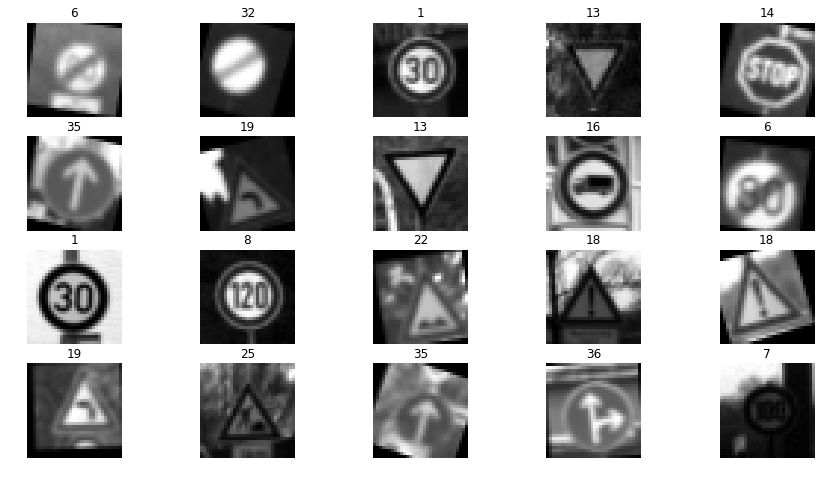

In [19]:
# Let's show 20 random examples in the new data
fig, axs = plt.subplots(4,5, figsize=(15, 8))
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(ppa_X_train))
    image = ppa_X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image.squeeze(), cmap = 'gray')
    axs[i].set_title(ppa_y_train[index])

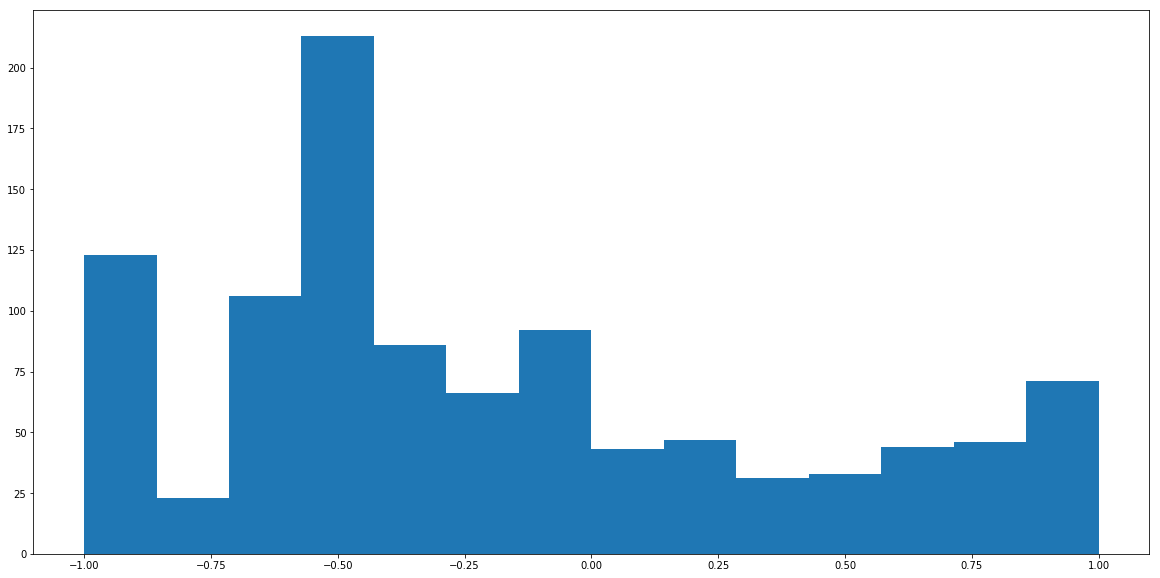

In [20]:
# Sanity check for pixel histogram of the last image.
plt.figure(figsize = (20, 10))
plt.hist(ppa_X_train[-1].ravel(), bins = 'auto')
plt.show()

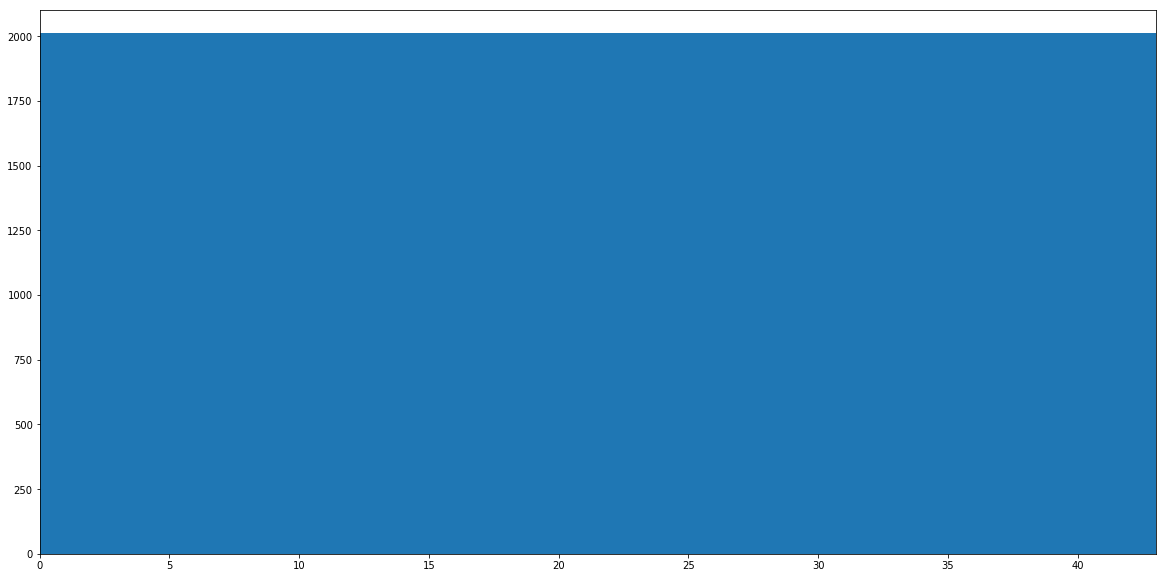

In [21]:
### Let's see the new class distribution.
plt.figure(figsize = (20, 10))
plt.hist(ppa_y_train, bins = range(44))
plt.axis([0, n_classes, 0, 2100])
plt.show()

Awesome! now it is an uniform distribution (it was a pretty agressive data augmentation).

In [22]:
### Now it's needed to Pre-Process images with Gray Scale and
### Normalization in the Validation and Testing sets.

### Pre-Processing for Validation set.
pp_X_valid = []
for image in X_valid:
    gray_img = gray_scale(image)
    norm_img = norm(gray_img)
    pp_X_valid.append(norm_img)
    
### Pre-Processing for Test set.
pp_X_test = []
for image in X_test:
    gray_img = gray_scale(image)
    norm_img = norm(gray_img)
    pp_X_test.append(norm_img)

### Model Architecture

The architecture that is going to be construct is the LeNet architecture.

In [23]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS        = 200
BATCH_SIZE    = 32
LEARNING_RATE = 0.00005
L2_BETA       = 0.0001

### A possible way to construct the network graph is with the help
### of helper functions design to return the layers with specific 
### parameters. In this case helper function are not going to be
### use, mainly because I like to have access to all the parameters.

# Arguments used for tf.truncated_normal, randomly defines variables for 
# the weights and biases for each layer.
mu    = 0.0
sigma = 0.1

# Placeholders for input/output batches.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
convkeep_prob = tf.placeholder(tf.float32)
fuclkeep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

# Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x16.
conv1_W = tf.Variable(tf.truncated_normal(shape = (5, 5, 1, 16), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.truncated_normal(shape = (1, 16), mean = mu, stddev = sigma))
conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') 
conv1   = tf.add(conv1, conv1_b)

# Layer 1: Activation function.
conv1_relu = tf.nn.relu(conv1)

# Layer 1: Dropout
conv1_dropout = tf.nn.dropout(conv1_relu, keep_prob = convkeep_prob)

# Layer 1: Pooling. Input = 28x28x16. Output = 14x14x16.
conv1_pool = tf.nn.max_pool(conv1_dropout, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# Layer 2: Convolutional. Input = 14x14x16. Output = 10x10x32.
conv2_W = tf.Variable(tf.truncated_normal(shape = (5, 5, 16, 32), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.truncated_normal(shape = (1, 32), mean = mu, stddev = sigma))
conv2   = tf.nn.conv2d(conv1_pool, conv2_W, strides=[1, 1, 1, 1], padding='VALID')
conv2   = tf.add(conv2, conv2_b)
    
# Layer 2: Activation.
conv2_relu = tf.nn.relu(conv2)

# Layer 2: Dropout
conv2_dropout = tf.nn.dropout(conv2_relu, keep_prob = convkeep_prob)

# Layer 2: Pooling. Input = 10x10x16. Output = 5x5x32.
conv2_pool = tf.nn.max_pool(conv2_dropout, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# Layer 3: Flatten. Input = 5x5x16. Output = 800.
fc0   = flatten(conv2_pool)
    
# Layer 3: Fully Connected. Input = 800. Output = 200.
fc1_W = tf.Variable(tf.truncated_normal(shape = (800, 200), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.truncated_normal(shape = (1,   200), mean = mu, stddev = sigma))
fc1   = tf.matmul(fc0, fc1_W)
fc1   = tf.add(fc1, fc1_b)
    
# Layer 3: Activation.
fc1_relu = tf.nn.relu(fc1)

# Layer 4: Fully Connected. Input = 200. Output = 100.
fc2_W = tf.Variable(tf.truncated_normal(shape = (200, 100), mean = mu, stddev = sigma))
fc2_b = tf.Variable(tf.truncated_normal(shape = (1,   100), mean = mu, stddev = sigma))
fc2   = tf.matmul(fc1_relu, fc2_W)
fc2   = tf.add(fc2, fc2_b)
    
# Layer 4: Activation.
fc2_relu = tf.nn.relu(fc2)

# Layer 5: Fully Connected. Input = 100. Output = 43.
fc3_W = tf.Variable(tf.truncated_normal(shape = (100, n_classes), mean = mu, stddev = sigma))
fc3_b = tf.Variable(tf.truncated_normal(shape = (1,   n_classes), mean = mu, stddev = sigma))

#Layer 5: Logits Output.
fc3    = tf.matmul(fc2_relu, fc3_W)
logits = tf.add(fc3, fc3_b)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [24]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Defining Loss
cross_entropy  = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
l2_loss        = tf.multiply((tf.nn.l2_loss(conv1_W) +
                              tf.nn.l2_loss(conv2_W) +
                              tf.nn.l2_loss(fc1_W)   +
                              tf.nn.l2_loss(fc2_W)   +
                              tf.nn.l2_loss(fc3_W)), L2_BETA)
total_loss     = tf.add(cross_entropy, l2_loss)
loss_operation = tf.reduce_mean(total_loss)

# Defining optimizer.
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

# Evaluation.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_data[offset:end], y_data[offset:end]
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, convkeep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss     += (    loss * len(batch_x))
    return (total_accuracy / num_examples), (total_loss / num_examples)

In [25]:
### The last step is to shuffle the generated data.
from sklearn.utils import shuffle

### Containers to store Accuracy values.
acc_train = []
acc_valid = []
acc_test  = []
loss_hist = []

training_loss       = 0.0
training_accuracy   = 0.0

validation_loss     = 0.0
validation_accuracy = 0.0

test_loss           = 0.0
test_accuracy       = 0.0

### Training Process.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./model'))
    validation_accuracy, validation_loss = evaluate(pp_X_valid, y_valid)
    
    if validation_accuracy >= 0.93:
        print("Model Loaded, Validation Accuracy over 0.93!")
        print("Printing Model History:")
        print()
        
        # Loading results
        loss_hist = pickle.load(open('./model/training_loss.p',       'rb'))
        acc_train = pickle.load(open('./model/training_accuracy.p',   'rb'))
        acc_valid = pickle.load(open('./model/validation_accuracy.p', 'rb'))
        acc_test  = pickle.load(open('./model/test_accuracy.p',       'rb'))
        
        # Printing model history.
        epoch_hist = len(loss_hist)
        for i in range(epoch_hist):
            print("EPOCH {} ...".format(i + 1))
            print("Loss                = {:.3f}".format(loss_hist[i]))
            print("Training Accuracy   = {:.3f}".format(acc_train[i]))
            print("Validation Accuracy = {:.3f}".format(acc_valid[i]))
            print("Test Accuracy       = {:.3f}".format(acc_test[i] ))
            print()
    else:
        sess.run(tf.global_variables_initializer())
        num_examples = len(ppa_X_train)
    
        print("Training...")
        print()
        for i in range(EPOCHS):
            if validation_accuracy <= 0.93:
                ppa_X_train, ppa_y_train = shuffle(ppa_X_train, ppa_y_train)
                for offset in range(0, num_examples, BATCH_SIZE):
                    end = offset + BATCH_SIZE
                    batch_x, batch_y = ppa_X_train[offset:end], ppa_y_train[offset:end]
                    sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, convkeep_prob: 0.3})
            
                training_accuracy, training_loss = evaluate(ppa_X_train, ppa_y_train)
                acc_train.append(training_accuracy)
                loss_hist.append(training_loss)
        
                validation_accuracy, validation_loss = evaluate(pp_X_valid, y_valid)
                acc_valid.append(validation_accuracy)
        
                test_accuracy, test_loss = evaluate(pp_X_test, y_test)
                acc_test.append(test_accuracy)
        
                print("EPOCH {} ...".format(i + 1))
                print("Loss                = {:.3f}".format(training_loss))
                print("Training Accuracy   = {:.3f}".format(training_accuracy))
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                print("Test Accuracy       = {:.3f}".format(test_accuracy))
                print()
            else:
                break
        
        saver.save(sess, './model/lenet')
        print("Model saved")
        
        # Saving results.
        pickle.dump(loss_hist, open('./model/training_loss.p',       'wb'))
        pickle.dump(acc_train, open('./model/training_accuracy.p',   'wb'))
        pickle.dump(acc_valid, open('./model/validation_accuracy.p', 'wb'))
        pickle.dump(acc_test,  open('./model/test_accuracy.p',       'wb'))

INFO:tensorflow:Restoring parameters from ./model\lenet
Model Loaded, Validation Accuracy over 0.93!
Printing Model History:

EPOCH 1 ...
Loss                = 3.655
Training Accuracy   = 0.145
Validation Accuracy = 0.228
Test Accuracy       = 0.208

EPOCH 2 ...
Loss                = 3.180
Training Accuracy   = 0.378
Validation Accuracy = 0.511
Test Accuracy       = 0.491

EPOCH 3 ...
Loss                = 2.841
Training Accuracy   = 0.490
Validation Accuracy = 0.607
Test Accuracy       = 0.583

EPOCH 4 ...
Loss                = 2.580
Training Accuracy   = 0.585
Validation Accuracy = 0.679
Test Accuracy       = 0.653

EPOCH 5 ...
Loss                = 2.357
Training Accuracy   = 0.650
Validation Accuracy = 0.725
Test Accuracy       = 0.699

EPOCH 6 ...
Loss                = 2.161
Training Accuracy   = 0.699
Validation Accuracy = 0.755
Test Accuracy       = 0.729

EPOCH 7 ...
Loss                = 2.013
Training Accuracy   = 0.738
Validation Accuracy = 0.770
Test Accuracy       = 0.750


### Training session analysis
Now it's time to load the result and plot how the model behaves during training.

In [26]:
# Loading results
loss_hist = pickle.load(open('./model/training_loss.p',       'rb'))
acc_train = pickle.load(open('./model/training_accuracy.p',   'rb'))
acc_valid = pickle.load(open('./model/validation_accuracy.p', 'rb'))
acc_test  = pickle.load(open('./model/test_accuracy.p',       'rb'))

Let's see how the loss behaved in all the training session.

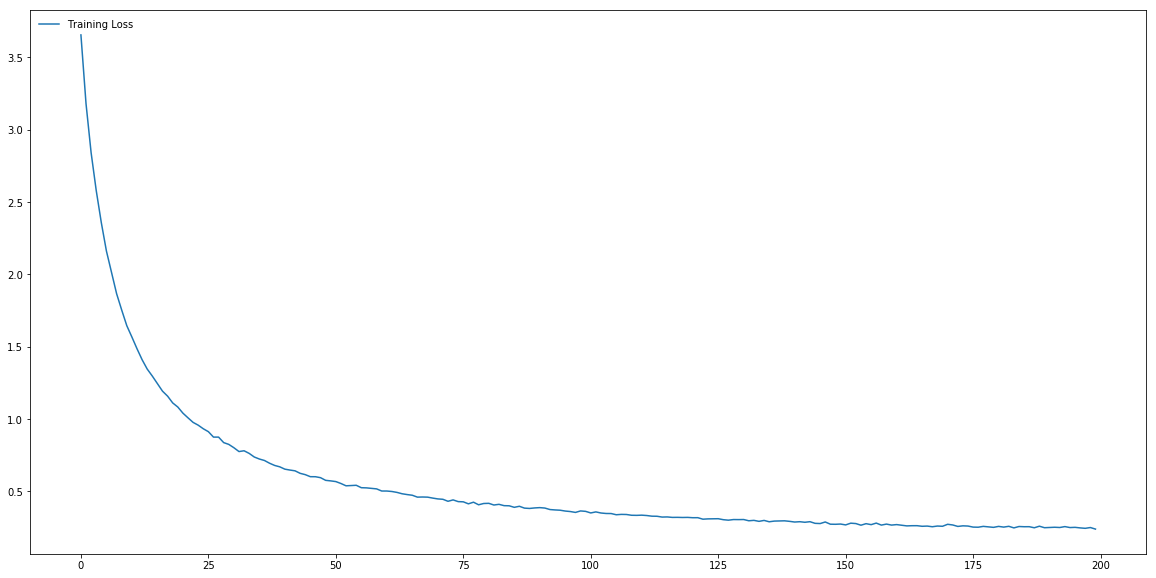

In [27]:
plt.figure(figsize = (20, 10))
plt.plot(range(len(loss_hist)), loss_hist, label = "Training Loss")
plt.legend(loc='upper left', frameon=False)
plt.show()

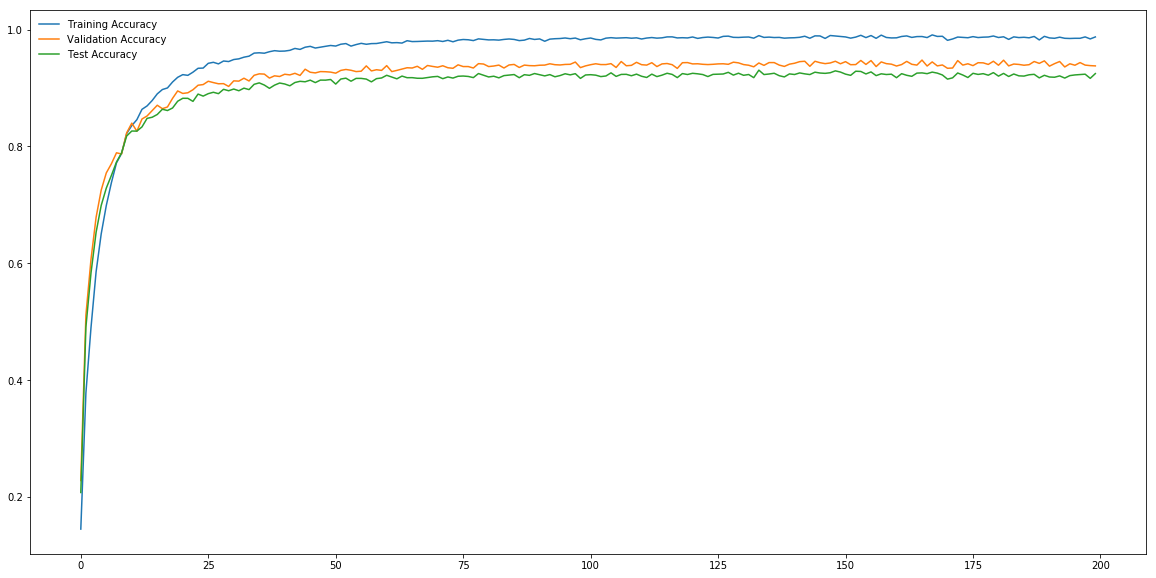

In [28]:
plt.figure(figsize = (20, 10))
plt.plot(range(len(acc_train)), acc_train, label = "Training Accuracy")
plt.plot(range(len(acc_valid)), acc_valid, label = "Validation Accuracy")
plt.plot(range(len(acc_test )), acc_test , label = "Test Accuracy")
plt.legend(loc='upper left', frameon=False)
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

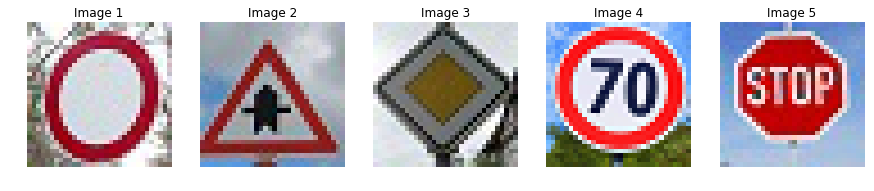

In [29]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
web_img = []
fig, axs = plt.subplots(1,5, figsize=(15, 8))
axs = axs.ravel()

for index in range(5):
    img     = cv2.imread("./examples/web_img_{}.jpg".format(index + 1))
    b,g,r   = cv2.split(img)         # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    web_img.append(rgb_img)
    axs[index].axis('off')
    axs[index].imshow(rgb_img)
    axs[index].set_title("Image {}".format(index + 1))

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./model\lenet


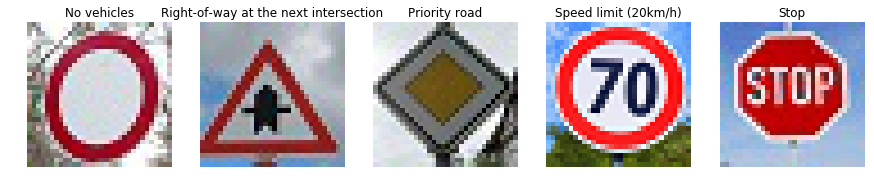

In [30]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import csv

### Pre-Processing for Web Images set.
pp_web_img = []
for image in web_img:
    gray_img = gray_scale(image)
    norm_img = norm(gray_img)
    pp_web_img.append(norm_img)
    
#Import traffic signs class names
signs_class=[]
with open('./data/signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        signs_class.append((row['SignName']))
        
fig, axs = plt.subplots(1,5, figsize=(15, 8))
axs = axs.ravel()

model_pred = tf.argmax(tf.nn.softmax(logits), 1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./model'))
    prediction = sess.run(model_pred, feed_dict={x: pp_web_img, convkeep_prob: 1.0})
    
    for index, image in enumerate(web_img):
        axs[index].axis('off')
        axs[index].imshow(image)
        axs[index].set_title(signs_class[prediction[index]])

### Analyze Performance

In [31]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

# The correct labels are as follow
correct_pred = [15, 11, 12, 4, 14]
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./model'))
    accuracy = sess.run(accuracy_operation, feed_dict={x: pp_web_img, y: correct_pred, convkeep_prob: 1.0})
    print("The accuracy in the 5 we images is {:.3f}%".format(accuracy * 100))

INFO:tensorflow:Restoring parameters from ./model\lenet
The accuracy in the 5 we images is 80.000%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./model\lenet
TopKV2(values=array([[  9.95929062e-01,   1.16324739e-03,   1.08091452e-03,
          5.41393820e-04,   4.03235666e-04],
       [  8.89964163e-01,   1.08338475e-01,   1.12530380e-03,
          3.79470555e-04,   1.44289923e-04],
       [  7.65238881e-01,   2.29169279e-01,   1.37071137e-03,
          1.18885492e-03,   1.04815676e-03],
       [  8.81496489e-01,   7.61624873e-02,   2.91959401e-02,
          5.35341352e-03,   4.07160213e-03],
       [  9.99727786e-01,   2.06606215e-04,   2.22373565e-05,
          2.08971960e-05,   1.00736243e-05]], dtype=float32), indices=array([[15, 38,  1, 35,  2],
       [11, 30, 28, 23, 21],
       [12, 40,  2,  7,  1],
       [ 0,  4,  1,  5,  3],
       [14,  1,  3,  8,  7]]))


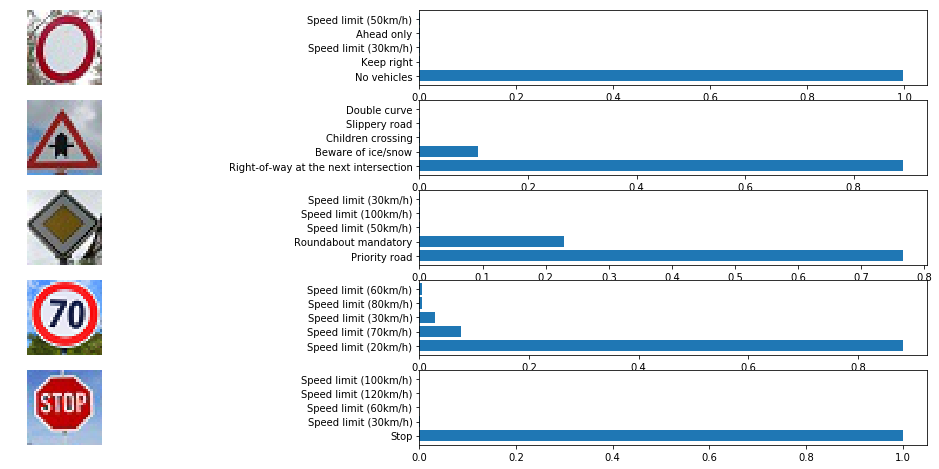

In [32]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
fig, axs = plt.subplots(5, 2, figsize=(20, 8))
axs = axs.ravel()

k_prob = tf.nn.top_k(tf.nn.softmax(logits), k = 5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./model'))
    top_k = sess.run(k_prob, feed_dict={x: pp_web_img, convkeep_prob: 1.0})
    print(top_k)
    
    for index, image in enumerate(web_img):
        axs[index * 2].axis('off')
        axs[index * 2].imshow(image)
        
        labels=[signs_class[i] for i in top_k.indices[index]]
        axs[(index * 2) + 1].barh(np.arange(1, 6, 1), top_k.values[index],
                                 tick_label = labels)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="examples/visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [33]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, convkeep_prob: 1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        plt.axis('off')
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

Using outputFeatureMap function is time to print what the network "sees" in the first convolution layer in all 5 web images examples:

INFO:tensorflow:Restoring parameters from ./model\lenet
INFO:tensorflow:Restoring parameters from ./model\lenet
INFO:tensorflow:Restoring parameters from ./model\lenet
INFO:tensorflow:Restoring parameters from ./model\lenet
INFO:tensorflow:Restoring parameters from ./model\lenet


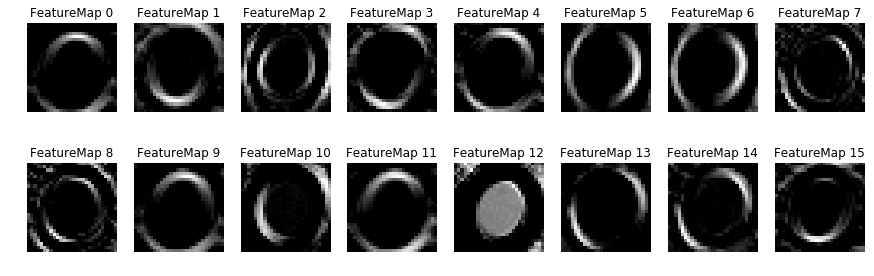

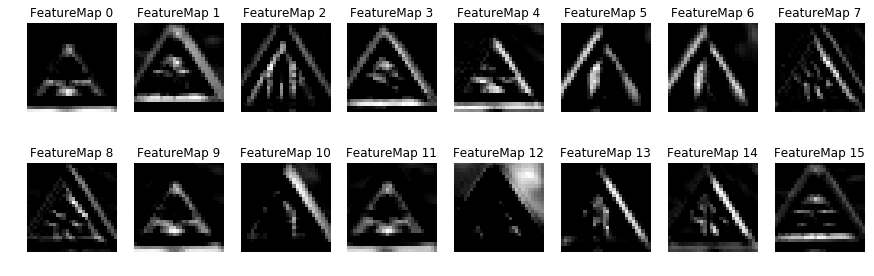

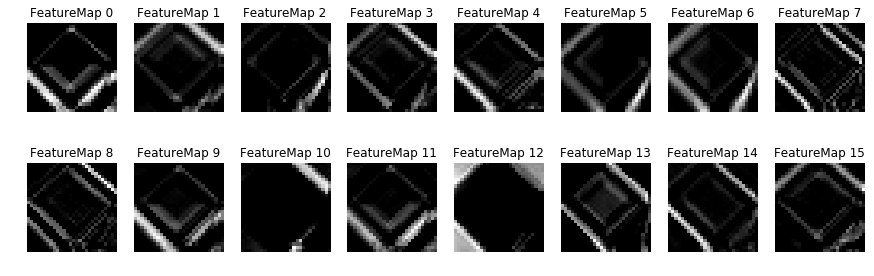

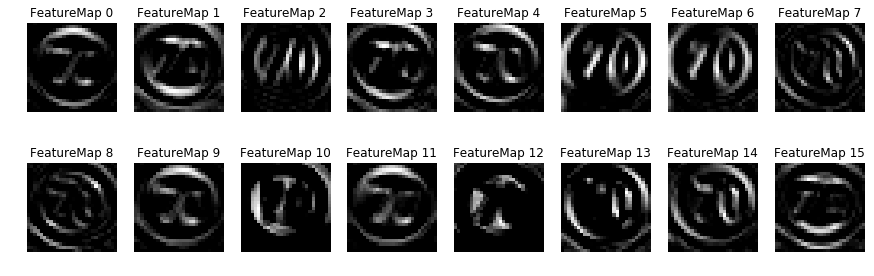

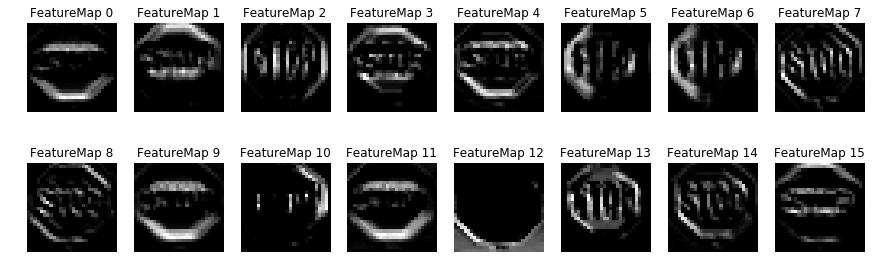

In [34]:
with tf.Session() as sess:
    for i in range(len(pp_web_img)):
        saver.restore(sess, tf.train.latest_checkpoint('./model'))
        outputFeatureMap(pp_web_img[i:i + 1], conv1_relu, plt_num=i)

Then let's see the second convolution layer:

INFO:tensorflow:Restoring parameters from ./model\lenet
INFO:tensorflow:Restoring parameters from ./model\lenet
INFO:tensorflow:Restoring parameters from ./model\lenet
INFO:tensorflow:Restoring parameters from ./model\lenet
INFO:tensorflow:Restoring parameters from ./model\lenet


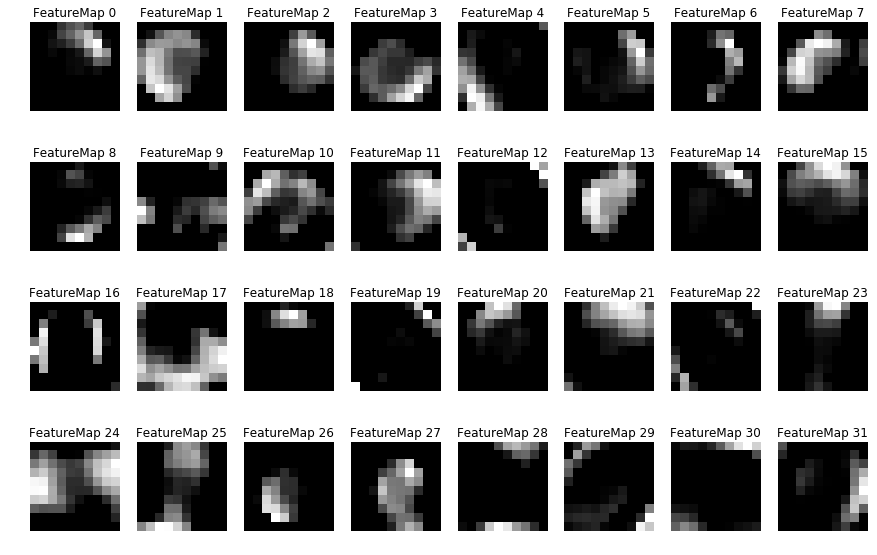

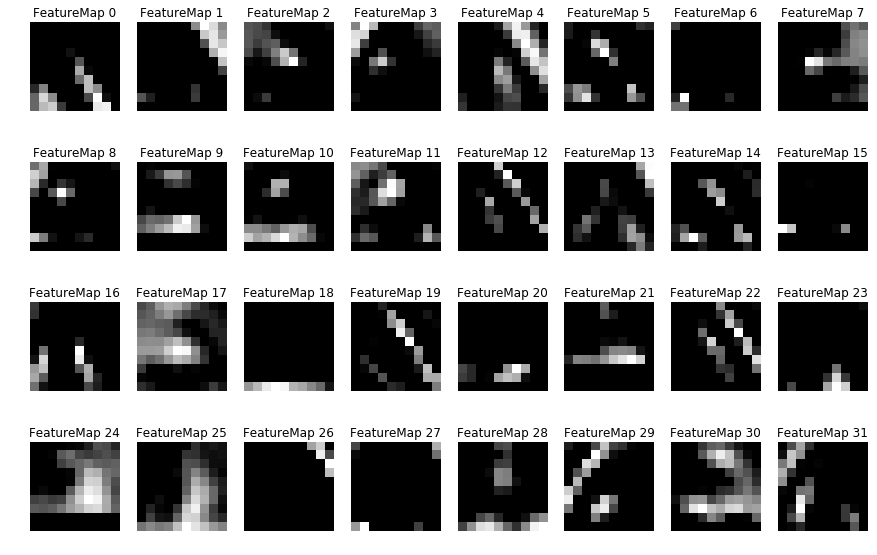

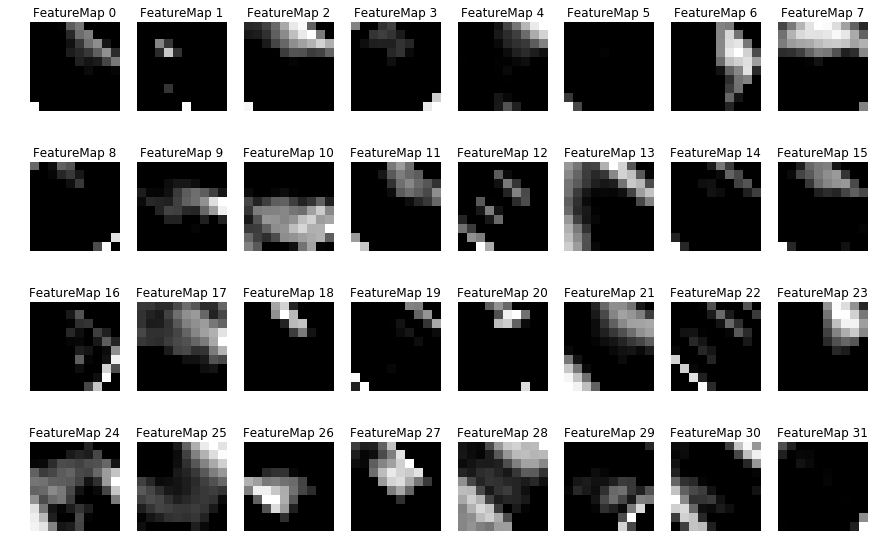

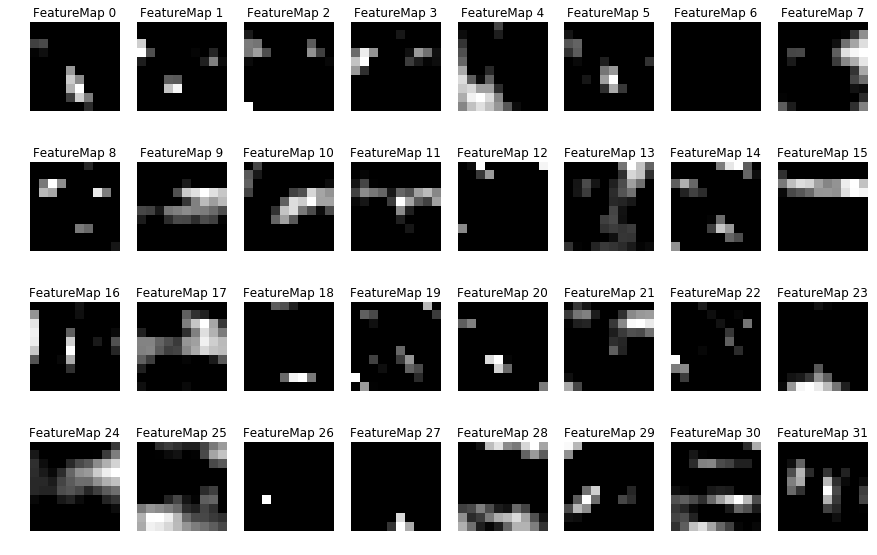

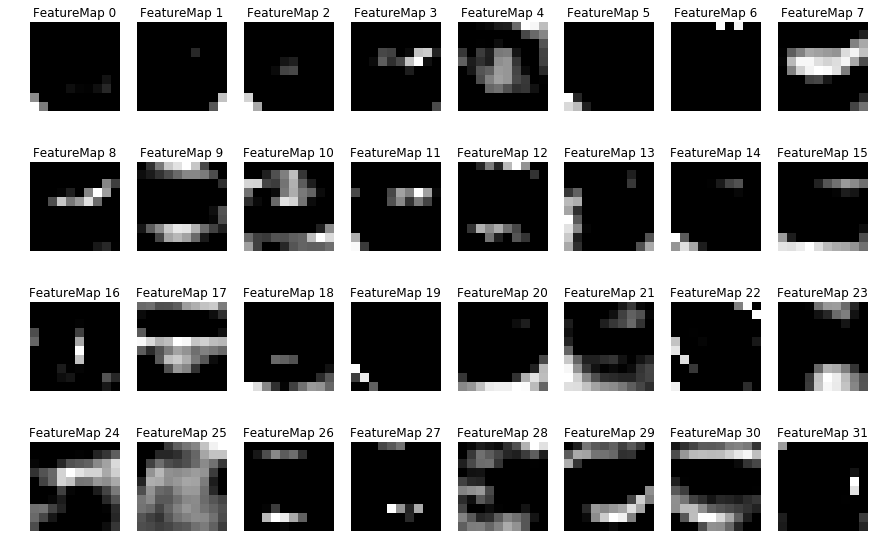

In [35]:
with tf.Session() as sess:
    for i in range(len(pp_web_img)):
        saver.restore(sess, tf.train.latest_checkpoint('./model'))
        outputFeatureMap(pp_web_img[i:i + 1], conv2_relu, plt_num=i)

Lastly I decided to implement a technique from a [NVIDIA paper](https://arxiv.org/pdf/1704.07911.pdf).

INFO:tensorflow:Restoring parameters from ./model\lenet
INFO:tensorflow:Restoring parameters from ./model\lenet
INFO:tensorflow:Restoring parameters from ./model\lenet
INFO:tensorflow:Restoring parameters from ./model\lenet
INFO:tensorflow:Restoring parameters from ./model\lenet


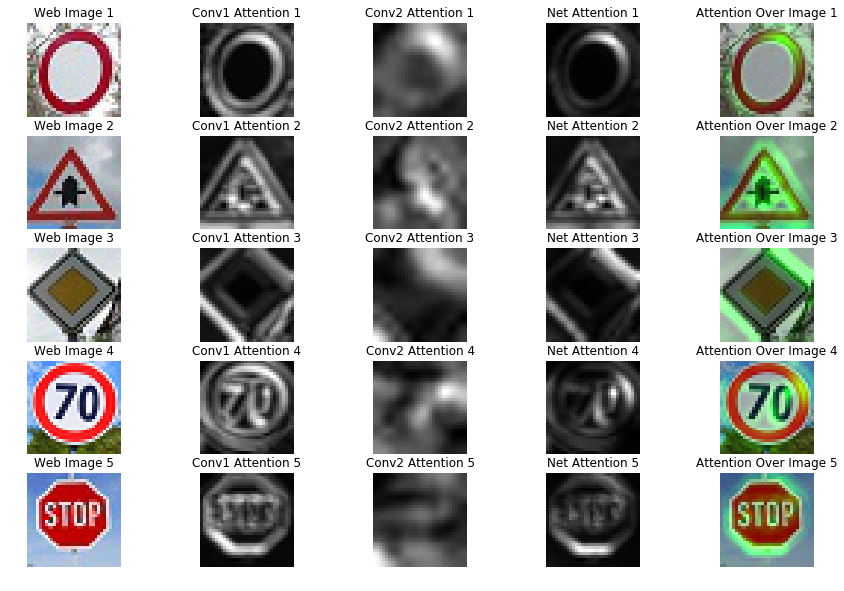

In [36]:
net_attention = []
cn1_attention = []
cn2_attention = []

with tf.Session() as sess:
    for i in range(len(pp_web_img)):
        saver.restore(sess, tf.train.latest_checkpoint('./model'))
        activation_conv1 = conv1_relu.eval(session=sess,feed_dict={x : pp_web_img[i:i + 1], convkeep_prob: 1.0})
        activation_conv2 = conv2_relu.eval(session=sess,feed_dict={x : pp_web_img[i:i + 1], convkeep_prob: 1.0})
        
        avg_activation_conv1 = np.average(activation_conv1, axis = 3)[0]
        avg_activation_conv1 = cv2.resize(avg_activation_conv1, None, fx = 1.14, fy = 1.14, interpolation = cv2.INTER_CUBIC)
        avg_activation_conv2 = np.average(activation_conv2, axis = 3)[0]
        avg_activation_conv2 = cv2.resize(avg_activation_conv2, None, fx = 3.2, fy = 3.2, interpolation = cv2.INTER_CUBIC)
        
        img_attention = np.multiply(avg_activation_conv1, avg_activation_conv2)
        norm_img = np.zeros(shape = (32, 32), dtype = np.uint8)
        norm_img = cv2.normalize(img_attention, 
                                 norm_img,
                                 alpha = 0, 
                                 beta  = 255, 
                                 norm_type = cv2.NORM_MINMAX, 
                                 dtype = cv2.CV_8U)
        
        net_attention.append(norm_img) 
        cn1_attention.append(avg_activation_conv1)
        cn2_attention.append(avg_activation_conv2)

fig, axs = plt.subplots(5, 5, figsize=(15, 10))
axs = axs.ravel()
for i in range(5):
    image = web_img[i]
    axs[i * 5].axis('off')
    axs[i * 5].imshow(image)
    axs[i * 5].set_title("Web Image " + str(i + 1))
    
    att_image = cn1_attention[i]
    axs[(i * 5) + 1].axis('off')
    axs[(i * 5) + 1].imshow(att_image.squeeze(), cmap = 'gray')
    axs[(i * 5) + 1].set_title("Conv1 Attention " + str(i + 1))
    
    att_image = cn2_attention[i]
    axs[(i * 5) + 2].axis('off')
    axs[(i * 5) + 2].imshow(att_image.squeeze(), cmap = 'gray')
    axs[(i * 5) + 2].set_title("Conv2 Attention " + str(i + 1))
    
    att_image = net_attention[i]
    axs[(i * 5) + 3].axis('off')
    axs[(i * 5) + 3].imshow(att_image.squeeze(), cmap = 'gray')
    axs[(i * 5) + 3].set_title("Net Attention " + str(i + 1))
    
    mask  = np.zeros((32, 32, 3), dtype=np.uint8)
    mask[:, :, 1]  = net_attention[i]
    att_image = cv2.addWeighted(image, 0.7, mask, 1.0, 0.0)
    axs[(i * 5) + 4].axis('off')
    axs[(i * 5) + 4].imshow(att_image)
    axs[(i * 5) + 4].set_title("Attention Over Image " + str(i + 1))